                  The Spark Foundation GRIP 2020
                  
Task 1: The task was to Predict the percentage of a student based on the number of study hours.

Name: Lokesh Kumar Mishra


In [1]:
#Loading the Libraries required for the execution 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Loading the data 
url = "http://bit.ly/w-data"
ds=pd.read_csv(url)
print("data loaded Successfully")
#for the convinience we have stored the data as ds

data loaded Successfully


In [3]:
#Exploring the data 
ds

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
ds.shape

(25, 2)

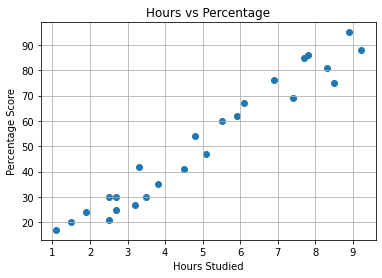

In [5]:
#plotting  the data to see if  there is  relation between the variables or not 
plt.scatter(ds["Hours"],ds["Scores"])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(True)

In [6]:
#from the graph we can clearly interpret that there is positive co-relation between hours studied  and percentage score 
#Preparing the data
#In the  next step we will  divide the data into "attributes" (inputs) and "labels" (outputs).


X = ds.iloc[:, :-1].values  
y = ds.iloc[:, 1].values  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)


from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


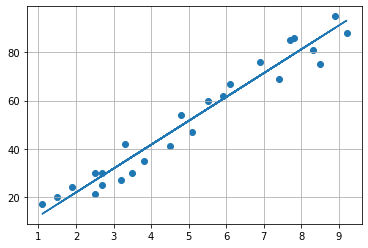

In [7]:
# Now we will Plot the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.grid()
plt.plot(X, line);
plt.show()

In [9]:
#Since  the algorithm training is done we will go for  Prediction Part 


print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:

predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
predicted_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [58]:
df = pd.DataFrame({'Hours': ds['Hours'], 'Actual': y,"prediction":regressor.predict(X)})  
df

,Hours,Actual,prediction
0,2.5,21,26.794801
1,5.1,47,52.562508
2,3.2,27,33.732261
3,8.5,75,86.258740
4,3.5,30,36.705458
5,1.5,20,16.884145
6,9.2,88,93.196200
7,5.5,60,56.526771
8,8.3,81,84.276609
9,2.7,25,28.776933


In [61]:
# You can also test with your own data
hour = float(input("Enter the Hour: "))
pdhour = np.array(hour).reshape(-1, 1)
own_pred = regressor.predict(pdhour)
print("No of Hours = {}".format(pdhour))
print("Predicted Score = {}".format(own_pred[0]))

Enter the Hour: 9.25
No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [62]:
#Evaluating the model

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
